# k-NN, Decision Tree, Random Forest, SVM, Neural Network + Bagging, Boosting, CV, Grid Search

##### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
import warnings # to silence convergence warnings
# Cross validation, bagging, boosting and oob for optimization
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, 
                             BaggingRegressor, GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as WeightedKNNRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

##### Functions from the exercises

In [5]:
def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu

def normalize(X):
    '''
    Function for normalizing the columns (variables) of a data matrix to unit length.
    Returns the normalized data and the L2 norm of the variables 
    
    Input  (X) --------> The data matrix to be normalized 
    Output (X_pre)-----> The normalized data matrix 
    Output (d) --------> Array with the L2 norms of the variables 
    '''
    d = np.linalg.norm(X,axis=0,ord=2)  # d is the euclidian lenghts of the variables 
    d[d==0]=1                           # Avoid dividing by zero if column L2 norm is zero 
    X_pre = X / d                       # Normalize the data with the euclidian lengths
    return X_pre,d                      # Return normalized data and the euclidian lengths

def weighted_knn(K, X, n):
    yhat = np.zeros(n)
    distances = np.zeros(n)
    # For each obs, compare distance to all other points in X
    for i in range(n):
        for j in range(n):
            distances[j] = distance.euclidean(X[i,:], X[j, :])

        # Sort all the distances
        idx = np.argsort(distances)[1:(K + 1)] # Skip first, as distance to "itself" does not make sense
        Wt = sum(distances[idx]) # Weight of k nearest neighbors
        W = distances[idx] / Wt # Weighing average


        yhat[i] = np.matmul(W.T, y[idx]) # Final value is weighted combination of neighbours
    
    return yhat



In [6]:
from sklearn.base import BaseEstimator, RegressorMixin

class WeightedKNNRegressor(BaseEstimator, RegressorMixin):
	def __init__(self, K):
		self.K = K

	def fit(self, X, y):
		self.X = X
		self.y = y

	def predict(self, X):
		n = X.shape[0]
		yhat = np.zeros(n)
		for i in range(n):
			distances = np.array([distance.euclidean(X[i], x) for x in self.X])
			idx = np.argsort(distances)[:self.K]
			Wt = sum(distances[idx])
			W = distances[idx] / Wt
			yhat[i] = np.dot(W, self.y[idx])
		return yhat

##### Load and format data

In [7]:
data = pd.read_csv('./Data/case1Data.csv')
y = np.array(data['y'])
X = np.array(data.drop('y', axis=1).fillna(data.mean()))
data = pd.read_csv('./Data/case1Data_Xnew.csv')
X_new = np.array(data.fillna(data.mean()))

In [8]:
def encode_categorical(X):
    # Round the last 5 columns to integers
    X[:, -5:] = np.round(X[:, -5:])

    # Convert to integers, then to strings to force categorical treatment
    cat_data = X[:, -5:].astype(int).astype(str)
    cat_df = pd.DataFrame(cat_data)
    cat = pd.get_dummies(cat_df).values

    # Separate numerical columns
    num = X[:, :-5]
    # Standardize numerical columns
    num, mu = centerData(num)
    num, d = normalize(num)   

    # Concatenate numerical and one-hot encoded categorical columns
    X = np.concatenate((num, cat), axis=1)

    print("Final X shape:", X.shape)

    return X

def standardize_numerical(X, y=None):
    
    # Standardize numerical columns
    X, mu = centerData(X)
    X, d = normalize(X)    
    if y is not None:
        y = centerData(y)[0]
    
    # Concatenate numerical and one-hot encoded categorical columns
    return X, y


In [9]:
X = encode_categorical(X)
# X, _ = standardize_numerical(X)
X_new = encode_categorical(X_new)

Final X shape: (100, 116)
Final X shape: (1000, 116)


In [10]:
pca = PCA(n_components=0.9)
pca_plot = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_plot = pca_plot.fit_transform(X)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=1312)

In [11]:

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1312)

(100, 116)
(100,)


##### Analyses

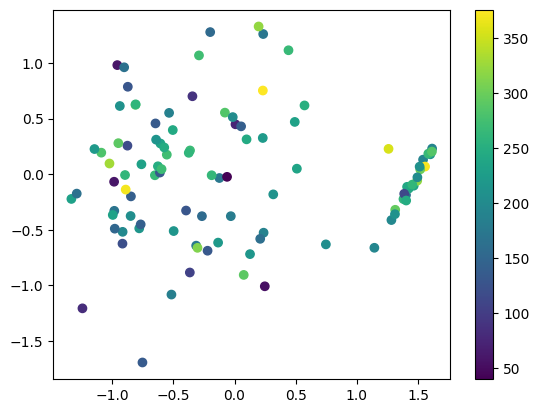

In [12]:
# Plot pca

plt.scatter(X_pca_plot[:,0], X_pca_plot[:,1], c=y, cmap='viridis')
plt.colorbar()
plt.show()

#### Model selection

In [13]:
# Model defitinions
rf = RandomForestRegressor(random_state=1312)
dt = DecisionTreeRegressor(random_state=1312)
svr = SVR()
ada = AdaBoostRegressor(random_state=1312)
bag = BaggingRegressor(random_state=1312)
dt = DecisionTreeRegressor(random_state=1312)
knn = WeightedKNNRegressor(5)
ols = LinearRegression() 
rr = Ridge() 
lasso = Lasso()
elnet = ElasticNet()




=== VANILLA MODELS ===
RandomForest - Best parameters: {'max_depth': None, 'n_estimators': 200}
RandomForest - CV RMSE: 50.6244
RandomForest - Test RMSE: 50.7839
DecisionTree - Best parameters: {'max_depth': 10}
DecisionTree - CV RMSE: 63.4342
DecisionTree - Test RMSE: 66.5639
SVR - Best parameters: {'C': 10, 'gamma': 'scale'}
SVR - CV RMSE: 72.2809
SVR - Test RMSE: 68.1579
KNN - Best parameters: {'K': 5}
KNN - CV RMSE: 72.4466
KNN - Test RMSE: 67.0231
AdaBoost - Best parameters: {'n_estimators': 500}
AdaBoost - CV RMSE: 48.4500
AdaBoost - Test RMSE: 49.4719
Bagging - Best parameters: {'n_estimators': 500}
Bagging - CV RMSE: 50.2541
Bagging - Test RMSE: 50.6736
OLS (no tuning) - Test RMSE: 50.4443
Ridge - Best parameters: {'alpha': np.float64(0.05134832907437552)}
Ridge - CV RMSE: 48.9788
Ridge - Test RMSE: 49.1862
Lasso - Best parameters: {'alpha': np.float64(0.1673725413919162)}
Lasso - CV RMSE: 31.6265
Lasso - Test RMSE: 38.8992
ElasticNet - Best parameters: {'alpha': np.float64(0.

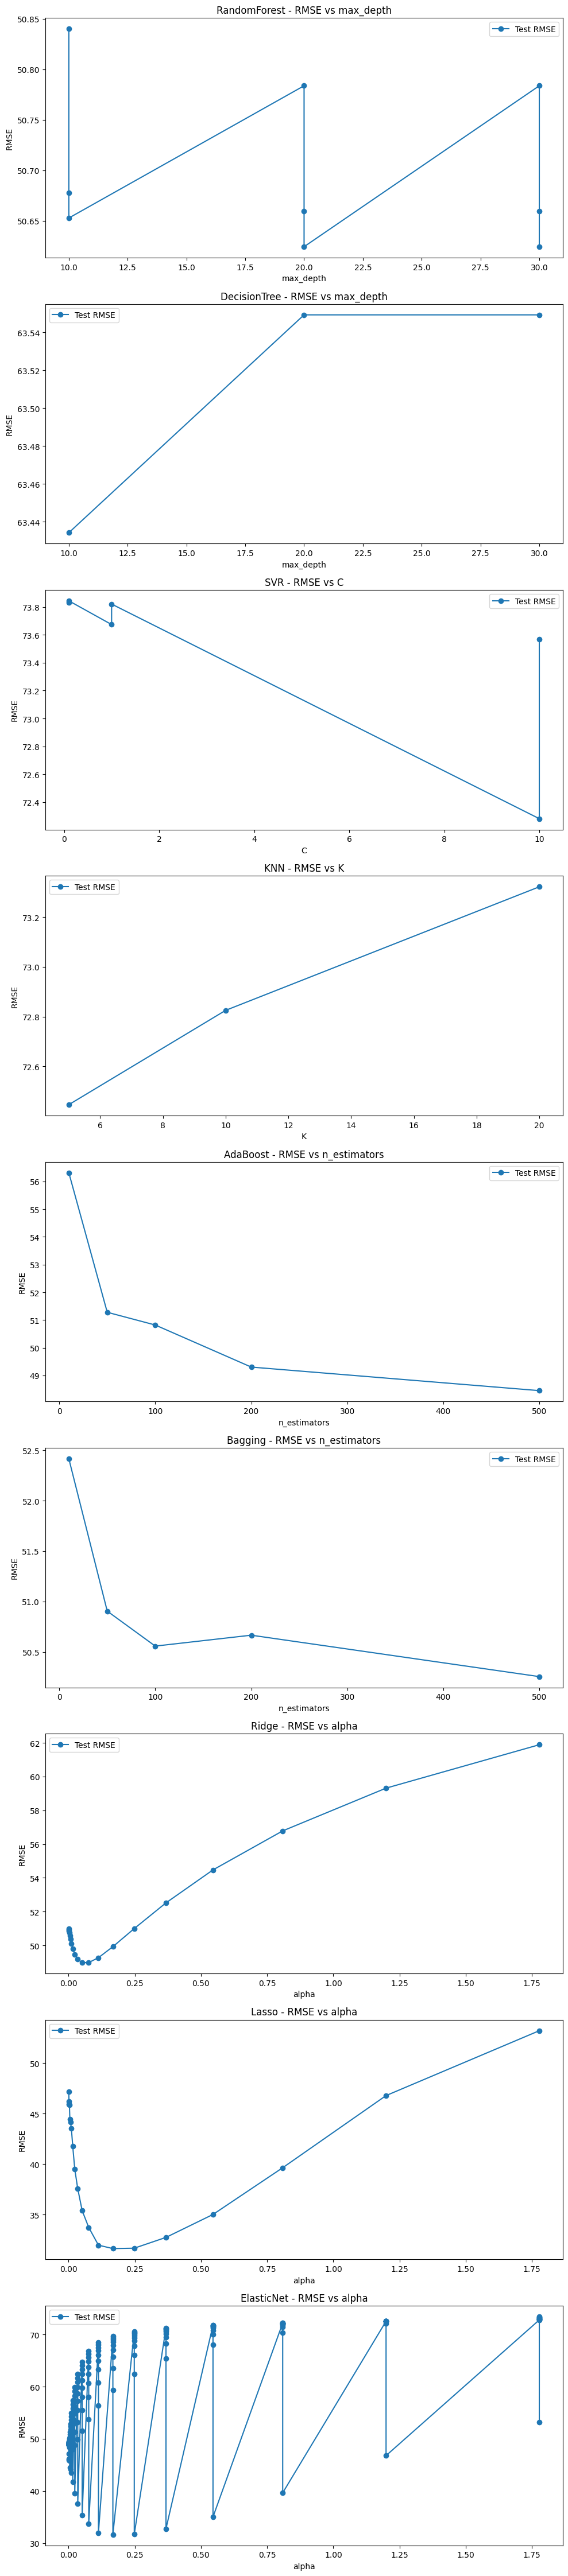


=== BOOSTED MODELS ===
AdaBoost_DecisionTree - CV RMSE: 49.8467, Test RMSE: 48.2493
GradientBoosting - CV RMSE: 45.1499, Test RMSE: 49.3146
AdaBoost_OLS - CV RMSE: 57.3674, Test RMSE: 53.8968
AdaBoost_Ridge - CV RMSE: 58.4966, Test RMSE: 53.9535
AdaBoost_Lasso - CV RMSE: 37.7848, Test RMSE: 39.1125

=== BAGGED MODELS ===
Bagging_RandomForest - CV RMSE: 56.2117, Test RMSE: 51.9603
Bagging_DecisionTree - CV RMSE: 52.4135, Test RMSE: 51.4539
Bagging_KNN - CV RMSE: 75.0774, Test RMSE: 67.2138
Bagging_OLS - CV RMSE: 51.6074, Test RMSE: 51.2291
Bagging_Ridge - CV RMSE: 52.9533, Test RMSE: 52.0042
Bagging_Lasso - CV RMSE: 37.7712, Test RMSE: 38.8369

=== BEST MODEL SELECTION ===
Best Model: Bagging_Lasso (bagged)
Best Test RMSE: 38.8369

=== MODEL PERFORMANCE SUMMARY (sorted by Test RMSE) ===
Bagging_Lasso (bagged): 38.8369
Lasso (vanilla): 38.8992
ElasticNet (vanilla): 38.8992
AdaBoost_Lasso (boosted): 39.1125
AdaBoost_DecisionTree (boosted): 48.2493
Ridge (vanilla): 49.1862
GradientBoostin

In [17]:


# Define the models and their parameter grids
models = {
    'RandomForest': (RandomForestRegressor(random_state=1312), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
    'DecisionTree': (DecisionTreeRegressor(random_state=1312), {'max_depth': [None, 10, 20, 30]}),
    'SVR': (SVR(), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}), 
    'KNN': (WeightedKNNRegressor(5), {'K': [5, 10, 20]}), 
    'AdaBoost': (AdaBoostRegressor(random_state=1312), {'n_estimators': [10, 50, 100, 200, 500]}), 
    'Bagging': (BaggingRegressor(random_state=1312), {'n_estimators': [10, 50, 100, 200, 500]}),
    'OLS': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': np.logspace(-3, 0.25, num=20)}),
    'Lasso': (Lasso(), {'alpha': np.logspace(-3, 0.25, num=20)}),
    'ElasticNet': (ElasticNet(), {'alpha': np.logspace(-3, 0.25, num=20), 'l1_ratio': np.linspace(0, 1, num=10)})
}

# Dictionary to store all RMSE results
all_results = {
    'vanilla': {},
    'bagged': {},
    'boosted': {}
}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Perform grid search for each model
    best_estimators = {}
    cv_results = {}
    
    print("\n=== VANILLA MODELS ===")
    for name, (model, params) in models.items():
        if not params:  # If the parameter grid is empty, skip GridSearchCV
            model.fit(X_train, y_train)
            best_estimators[name] = model
            # Calculate RMSE on test set
            y_pred = model.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            all_results['vanilla'][name] = test_rmse
            print(f"{name} (no tuning) - Test RMSE: {test_rmse:.4f}")
        else:
            grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
            grid_search.fit(X_train, y_train)
            best_estimators[name] = grid_search.best_estimator_
            cv_results[name] = grid_search.cv_results_
            
            # Calculate RMSE on test set
            y_pred = grid_search.best_estimator_.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            all_results['vanilla'][name] = test_rmse
            
            print(f"{name} - Best parameters: {grid_search.best_params_}")
            print(f"{name} - CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")
            print(f"{name} - Test RMSE: {test_rmse:.4f}")
    
    # Plotting the RMSE for each model with hyperparameters
    fig, axes = plt.subplots(len(cv_results), 1, figsize=(10, 5 * len(cv_results)))
    if len(cv_results) == 1:
        axes = [axes]

    for i, (name, result) in enumerate(cv_results.items()):
        if len(result['params'][0]) > 0:  # Only plot if there are hyperparameters
            ax = axes[i] if len(cv_results) > 1 else axes
            param_name = list(result['params'][0].keys())[0]
            # Organize by parameter value for plotting
            param_values = [param[param_name] for param in result['params'] if param_name in param]
            if len(param_values) == 0:
                continue
                
            # Create sorted pairs of (param_value, score)
            # Filter out None values from param_values and their corresponding scores
            filtered_pairs = [(param, score) for param, score in zip(param_values, np.sqrt(-result['mean_test_score'])) if param is not None]
            # Sort by parameter value
            sorted_pairs = sorted(filtered_pairs, key=lambda x: x[0] if not isinstance(x[0], str) else 0)
            
            param_range, mean_test_score = zip(*sorted_pairs)
            
            ax.plot(param_range, mean_test_score, 'o-', label='Test RMSE')
            ax.set_title(f'{name} - RMSE vs {param_name}')
            ax.set_xlabel(param_name)
            ax.set_ylabel('RMSE')
            ax.legend()

    plt.tight_layout()
    plt.show()

    # Use boosting to improve the results
    print("\n=== BOOSTED MODELS ===")
    boosted_models = {
        'AdaBoost_DecisionTree': AdaBoostRegressor(estimator=best_estimators['DecisionTree'], n_estimators=100, random_state=1312),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1312),
        'AdaBoost_OLS': AdaBoostRegressor(estimator=best_estimators['OLS'], n_estimators=100, random_state=1312),
        'AdaBoost_Ridge': AdaBoostRegressor(estimator=best_estimators['Ridge'], n_estimators=100, random_state=1312),
        'AdaBoost_Lasso': AdaBoostRegressor(estimator=best_estimators['Lasso'], n_estimators=100, random_state=1312)
    }

    # Evaluate the boosted models on the test set
    for name, model in boosted_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_results['boosted'][name] = test_rmse
        
        # Also calculate CV score for comparison
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-scores.mean())
        
        print(f"{name} - CV RMSE: {cv_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

    # Use bagging and evaluate on test set
    print("\n=== BAGGED MODELS ===")
    bagging_models = {
        'Bagging_RandomForest': BaggingRegressor(estimator=best_estimators['RandomForest'], n_estimators=10, random_state=1312),
        'Bagging_DecisionTree': BaggingRegressor(estimator=best_estimators['DecisionTree'], n_estimators=10, random_state=1312),
        'Bagging_KNN': BaggingRegressor(estimator=best_estimators['KNN'], n_estimators=10, random_state=1312),
        'Bagging_OLS': BaggingRegressor(estimator=best_estimators['OLS'], n_estimators=10, random_state=1312),
        'Bagging_Ridge': BaggingRegressor(estimator=best_estimators['Ridge'], n_estimators=10, random_state=1312),
        'Bagging_Lasso': BaggingRegressor(estimator=best_estimators['Lasso'], n_estimators=10, random_state=1312)
    }

    for name, model in bagging_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        all_results['bagged'][name] = test_rmse
        
        # Also calculate CV score for comparison
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-scores.mean())
        
        print(f"{name} - CV RMSE: {cv_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

    # Find the best model across all categories
    best_category = min(all_results, key=lambda x: min(all_results[x].values()))
    best_model_name = min(all_results[best_category], key=lambda x: all_results[best_category][x])
    best_rmse = all_results[best_category][best_model_name]
    
    print("\n=== BEST MODEL SELECTION ===")
    print(f"Best Model: {best_model_name} ({best_category})")
    print(f"Best Test RMSE: {best_rmse:.4f}")
    
    # Print summary of all models sorted by performance
    print("\n=== MODEL PERFORMANCE SUMMARY (sorted by Test RMSE) ===")
    all_models_rmse = []
    for category in all_results:
        for model_name, rmse in all_results[category].items():
            all_models_rmse.append((f"{model_name} ({category})", rmse))
    
    all_models_rmse.sort(key=lambda x: x[1])
    for model_name, rmse in all_models_rmse:
        print(f"{model_name}: {rmse:.4f}")

In [18]:
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
# # Perform grid search for each model
#     best_estimators_pca = {}
#     for name, (model, params) in models.items():
#         grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
#         grid_search.fit(X_pca_train, y_pca_train)
#         best_estimators_pca[name] = grid_search.best_estimator_
#         print(f"Best parameters for {name} with PCA: {grid_search.best_params_}")

#     # Use boosting to improve the results
#     boosted_models_pca = {
#         'AdaBoost': AdaBoostRegressor(estimator=best_estimators_pca['DecisionTree'], n_estimators=100, random_state=1312),
#         'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1312),
#         'ols': AdaBoostRegressor(estimator=best_estimators_pca['OLS'], n_estimators=100, random_state=1312),
#         'Ridge': AdaBoostRegressor(estimator=best_estimators_pca['Ridge'], n_estimators=100, random_state=1312),
#         'Lasso': AdaBoostRegressor(estimator=best_estimators_pca['Lasso'], n_estimators=100, random_state=1312)
#     }

#     # Evaluate the boosted models using cross-validation
#     for name, model in boosted_models_pca.items():
#         scores_pca = cross_val_score(model, X_pca_train, y_pca_train, cv=5, scoring='neg_mean_squared_error')
#         rmse_scores_pca = np.sqrt(-scores_pca)
#         print(f"RMSE for {name} with boosting and PCA: {rmse_scores_pca.mean()}")

#     # Use bagging and cross-validation to estimate the RMSE generalization error
#     bagging_models_pca = {
#         'RandomForest': BaggingRegressor(estimator=best_estimators_pca['RandomForest'], n_estimators=10, random_state=1312),
#         'DecisionTree': BaggingRegressor(estimator=best_estimators_pca['DecisionTree'], n_estimators=10, random_state=1312),
#         'KNN': BaggingRegressor(estimator=best_estimators_pca['KNN'], n_estimators=10, random_state=1312),
#         'OLS': BaggingRegressor(estimator=best_estimators_pca['OLS'], n_estimators=10, random_state=1312), # Not recommended
#         'Ridge': BaggingRegressor(estimator=best_estimators_pca['Ridge'], n_estimators=10, random_state=1312),
#         'Lasso': BaggingRegressor(estimator=best_estimators_pca['Lasso'], n_estimators=10, random_state=1312)
#     }

#     for name, model in bagging_models_pca.items():
#         scores_pca = cross_val_score(model, X_pca_train, y_pca_train, cv=5, scoring='neg_mean_squared_error')
#         rmse_scores_pca = np.sqrt(-scores_pca)
#         print(f"RMSE for {name} with bagging and PCA: {rmse_scores_pca.mean()}")

In [19]:
# # Evaluate the best models on the test set
# for name, model in best_estimators.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     print(f"RMSE for {name} on test set: {rmse}")

# print("")

# for name, model in best_estimators_pca.items():
#     model.fit(X_pca_train, y_pca_train)
#     y_pred_pca = model.predict(X_pca_test)
#     rmse_pca = np.sqrt(mean_squared_error(y_pca_test, y_pred_pca))
#     print(f"RMSE for {name} on test set with PCA: {rmse_pca}")

# print("")
# print(f"RMSE for {name} on test set: {np.min(rmse)}")
# print(f"RMSE for {name} on test set with PCA: {np.min(rmse_pca)}")

In [20]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.base import clone

def compute_epe_with_small_labeled(model, X_labeled, y_labeled, X_unlabeled, n_bootstraps=100):
    """
    Compute EPE decomposition (σₑ² + Bias² + Variance) using a small labeled subset and unlabeled data.
    
    Args:
        model: Pre-trained Lasso model (used for hyperparameters and σₑ²).
        X_labeled: Labeled subset features (shape: [n_labeled_samples, n_features]).
        y_labeled: Labeled subset targets (shape: [n_labeled_samples]).
        X_unlabeled: Unlabeled data features (shape: [n_unlabeled_samples, n_features]).
        n_bootstraps: Number of bootstrap iterations (default: 100).
    
    Returns:
        epe: Total Expected Prediction Error.
        sigma_e_sq: Irreducible error.
        bias_sq: Squared bias.
        variance: Prediction variance.
    """
    # Step 1: Compute irreducible error (σₑ²) using the labeled subset
    y_pred_labeled = model.predict(X_labeled)
    sigma_e_sq = np.var(y_labeled - y_pred_labeled, ddof=1)  # Unbiased estimate

    # Step 2: Bootstrap training on the labeled subset to estimate bias and variance
    n_labeled = X_labeled.shape[0]
    n_unlabeled = X_unlabeled.shape[0]
    
    # Arrays to store predictions for labeled and unlabeled data
    preds_labeled = np.zeros((n_bootstraps, n_labeled))
    preds_unlabeled = np.zeros((n_bootstraps, n_unlabeled))

    for i in range(n_bootstraps):
        # Create bootstrap sample
        indices = np.random.choice(n_labeled, n_labeled, replace=True)
        X_boot, y_boot = X_labeled[indices], y_labeled[indices]
        
        # Clone model to retain hyperparameters and train on bootstrap sample
        m = clone(model)
        m.fit(X_boot, y_boot)
        
        # Predict on labeled and unlabeled data
        preds_labeled[i] = m.predict(X_labeled)
        preds_unlabeled[i] = m.predict(X_unlabeled)

    # Step 3: Compute bias² (using labeled subset)
    mean_preds_labeled = np.mean(preds_labeled, axis=0)
    bias_sq = np.mean((mean_preds_labeled - y_labeled) ** 2)

    # Step 4: Compute variance (using unlabeled data)
    variance = np.mean(np.var(preds_unlabeled, axis=0, ddof=1))

    # Step 5: Total EPE
    epe = sigma_e_sq + bias_sq + variance

    return epe, sigma_e_sq, bias_sq, variance

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the range of alphas for Lasso
alphas = np.logspace(-3, 3, 20)  # Example range of alpha values
K = 5  # Number of cross-validation folds

# Store RMSE for each alpha
RMSE = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Perform cross-validation for each alpha
    for alpha in alphas:
        model = Lasso(alpha=alpha, max_iter=10000)
        scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        RMSE.append(rmse_scores)

    RMSE = np.array(RMSE)
    meanRMSE = np.mean(RMSE, axis=1)  # Mean RMSE for each alpha
    jOpt = np.argmin(meanRMSE)  # Index of the optimal alpha (smallest RMSE)

# Calculate the standard error for the best alpha
seRMSE = np.std(RMSE, axis=1) / np.sqrt(K)

# Find the largest alpha within one standard error of the optimal alpha
J = np.where(meanRMSE[jOpt] + seRMSE[jOpt] > meanRMSE)[0]
Alpha_CV_1StdRule = alphas[J[-1]]

print(f"Optimal alpha: {alphas[jOpt]:.4f}")
print(f"CV alpha with 1-std-rule: {Alpha_CV_1StdRule:.4f}")

# Train the final model with the selected alpha
final_model = Lasso(alpha=Alpha_CV_1StdRule, max_iter=10000)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, final_model.predict(X_test)))
print(f"Final RMSE on test set: {final_rmse:.4f}")

epe, std, bias, var = compute_epe_with_small_labeled(final_model, X_train, y_train, X_new)


print(f"Expected Prediction Error (EPE): {epe:.4f}")
print(f"Irreducible Error (σₑ²): {std:.4f}")
print(f"Bias²: {bias:.4f}")
print(f"Variance: {var:.4f}")


# Predict on X_new using the final model
y_new_pred = final_model.predict(X_new)

# Save the predicted values to a CSV file
#np.savetxt('sample_estimate_prediction_s215160.csv', y_new_pred, delimiter=',', fmt='%f')

Optimal alpha: 0.1624
CV alpha with 1-std-rule: 0.3360
Final RMSE on test set: 38.1111
Expected Prediction Error (EPE): 1267.6513
Irreducible Error (σₑ²): 365.1533
Bias²: 578.4914
Variance: 324.0066


In [22]:
# Expected RMSE

rmse_hat = np.sqrt(epe)

print(f"Expected RMSE: {rmse_hat:.4f}")

Expected RMSE: 35.6041
